In [3]:
# ------------------------
# scikit-learn 설치 
# ------------------------
# !conda install scikit-learn
# !pip install scikit-learn

# 설치 확인
from sklearn.linear_model import LinearRegression


In [4]:
# ------------------------
# koreanize_matplotlib 설치 
# ------------------------
# !conda install koreanize_matplotlib
# !pip install koreanize_matplotlib

# 설치 확인
import koreanize_matplotlib


# 문제 정의
* 플랫폼 별 광고비 지출에 다른 판매량 분석 및 예측

# 데이터 수집
* https://www.kaggle.com/datasets/ashydv/advertising-dataset


# 패키지 불러오기

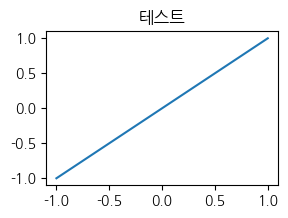

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

plt.figure(figsize=(3,2))
plt.plot([-1,0,1], [-1,0,1])
plt.title('테스트')
pass


# 데이터 불러오기

In [8]:
# ----------------------------------------
# 데이터를 불러와 데이터프레임을 만들고
# 상위 5개 행을 확인합니다.
# ----------------------------------------
df = pd.read_csv('data/advertising.csv')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


# 데이터 탐색
* 독립변수와 종속변수를 식별합니다.
* 각 변수의 자료형, 결측치 여부, 통계적 특성을 확인합니다.
* 종속변수와 독립변수의 관계를 중심으로 탐색합니다.

In [9]:
# ----------------------------------------
# 데이터프레임 정보 확인
#   - 자료형, 결측치 여부 확인
# ----------------------------------------

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [10]:
# ----------------------------------------
# 수치형 데이터 - 요약통계 확인
# ----------------------------------------
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


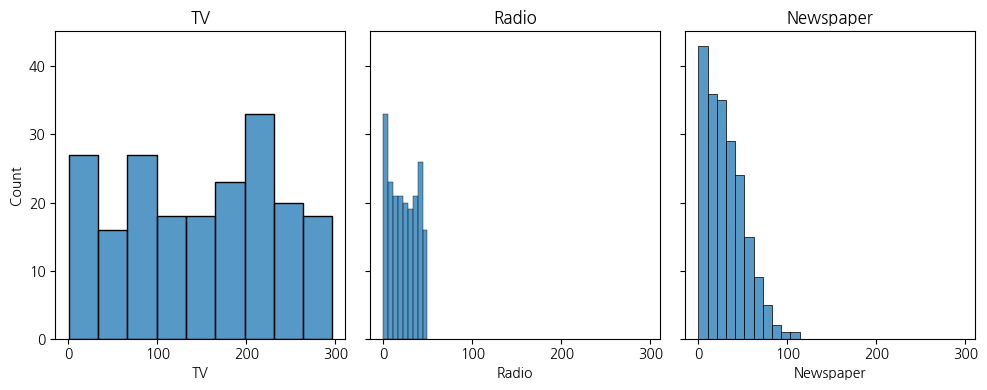

In [26]:
# ----------------------------------------
# 수치형 독립변수의 분포 확인
# ----------------------------------------

cols = ['TV', 'Radio', 'Newspaper']

fig, ax = plt.subplots(1,3, figsize=(10,4), sharex=True, sharey=True)

sns.histplot(x=cols[0], data=df, ax=ax[0])
sns.histplot(x=cols[1], data=df, ax=ax[1])
sns.histplot(x=cols[2], data=df, ax=ax[2])

ax[0].set_title('TV')
ax[1].set_title('Radio')
ax[2].set_title('Newspaper')
plt.tight_layout()


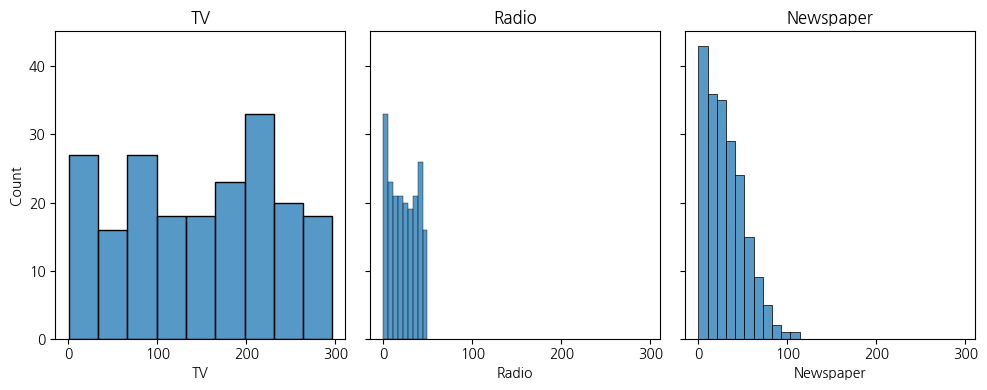

In [27]:
# ----------------------------------------
# 수치형 독립변수의 분포 확인 => 반복문으로 코드 효율화
# ----------------------------------------

cols = ['TV', 'Radio', 'Newspaper']

fig, ax = plt.subplots(1,3, figsize=(10,4), sharex=True, sharey=True)

for i, col in enumerate(cols) :
    sns.histplot(x=col, data=df, ax=ax[i])
    ax[i].set_title(col)

plt.tight_layout()

<Axes: >

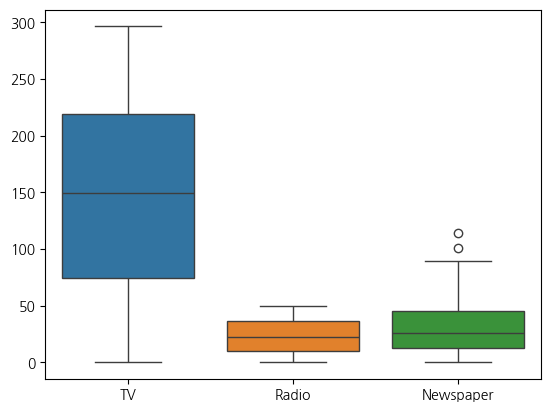

In [30]:
sns.boxplot(df[['TV', 'Radio', 'Newspaper']])

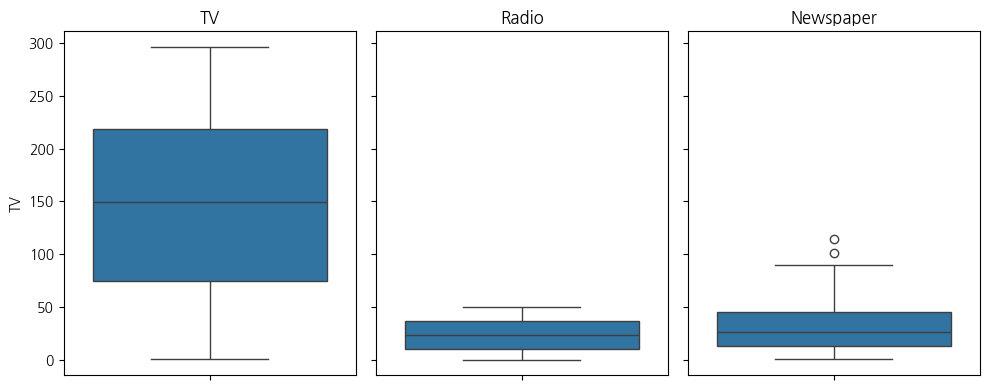

In [32]:
# ----------------------------------------
# 수치형 독립변수의 분포 확인 - 박스플롯
# ----------------------------------------

cols = ['TV', 'Radio', 'Newspaper']

fig, ax = plt.subplots(1,3, figsize=(10,4), sharex=True, sharey=True)

for i, col in enumerate(cols) :
    sns.boxplot(y=col, data=df, ax=ax[i])
    ax[i].set_title(col)

plt.tight_layout()

<Axes: xlabel='Sales', ylabel='Count'>

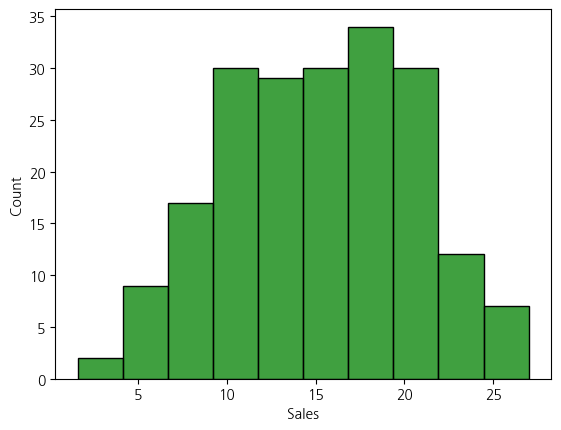

In [35]:
# ----------------------------------------
# 수치형 종속변수의 분포 확인 
# ----------------------------------------
plt.Figure(figsize=(3,2))
sns.histplot(x='Sales', data=df, color='green')

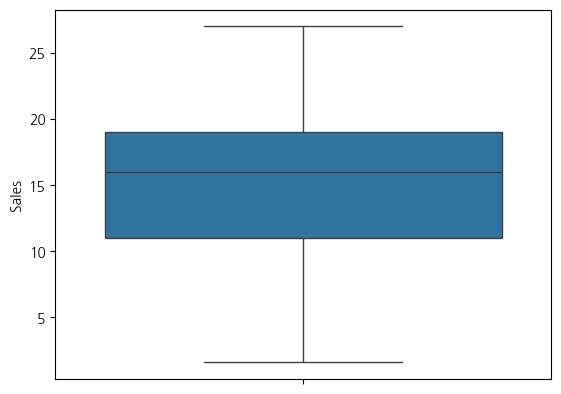

In [37]:
plt.Figure(figsize=(3,2))
sns.boxplot(y='Sales', data=df)
pass

In [39]:
sns.histplot?

Signature:
sns.histplot(
    data=None,
    *,
    x=None,
    y=None,
    hue=None,
    weights=None,
    stat='count',
    bins='auto',
    binwidth=None,
    binrange=None,
    discrete=None,
    cumulative=False,
    common_bins=True,
    common_norm=True,
    multiple='layer',
    element='bars',
    fill=True,
    shrink=1,
    kde=False,
    kde_kws=None,
    line_kws=None,
    thresh=0,
    pthresh=None,
    pmax=None,
    cbar=False,
    cbar_ax=None,
    cbar_kws=None,
    palette=None,
    hue_order=None,
    hue_norm=None,
    color=None,
    log_scale=None,
    legend=True,
    ax=None,
    **kwargs,
)
Docstring:
Plot univariate or bivariate histograms to show distributions of datasets.

A histogram is a classic visualization tool that represents the distribution
of one or more variables by counting the number of observations that fall within
discrete bins.

This function can normalize the statistic computed within each bin to estimate
frequency, density or probability mas

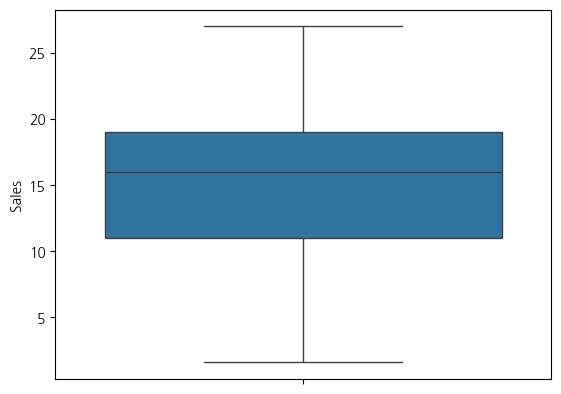

In [38]:
# ----------------------------------------
# 수치형 종속변수의 분포 확인  - 박스플롯
# ----------------------------------------
plt.Figure(figsize=(3,2))
sns.boxplot(y='Sales', data=df)
pass

## 독립변수와 종속변수간의 관계 파악

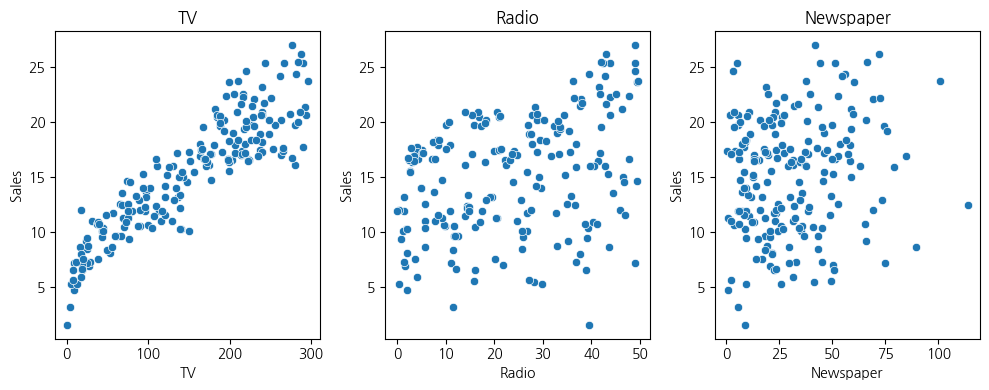

In [46]:
# ----------------------------------------
# scatterplot
# ----------------------------------------

cols = ['TV', 'Radio', 'Newspaper']

fig, ax = plt.subplots(1,3, figsize=(10,4))

for i, col in enumerate(cols) :
    sns.scatterplot(x=col, y='Sales', data=df, ax=ax[i])
    ax[i].set_title(col)

plt.tight_layout()

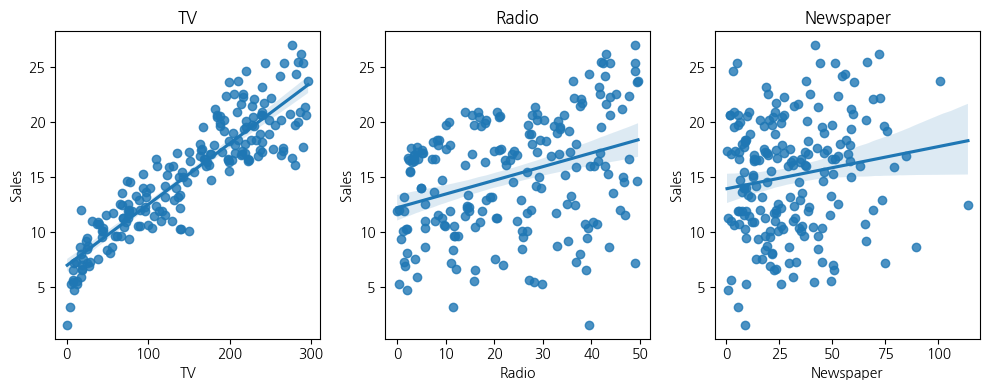

In [48]:
# ----------------------------------------
# regplot
# ----------------------------------------

cols = ['TV', 'Radio', 'Newspaper']

fig, ax = plt.subplots(1,3, figsize=(10,4))

for i, col in enumerate(cols) :
    sns.regplot(x=col, y='Sales', data=df, ax=ax[i])
    ax[i].set_title(col)

plt.tight_layout()


## 상관계수
- 수치형 데이터 간의 상관계수 : 피어슨 상관계수
- 독립변수와 종속변수 간의 상관계수 
- 독립변수 간의 상관계수 -> 다중공선성 확인

In [49]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


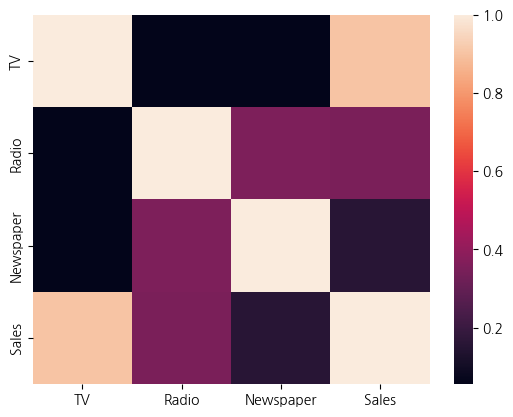

In [53]:
sns.heatmap(df.corr())
pass

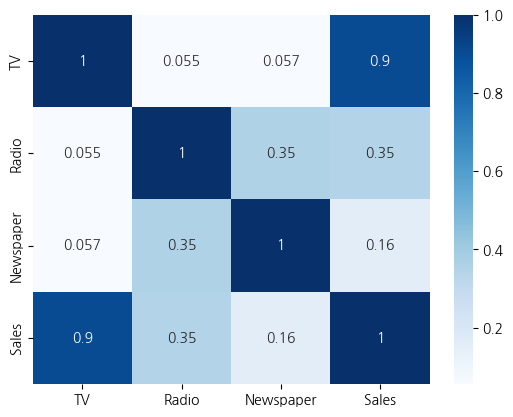

In [54]:
sns.heatmap(df.corr(), cmap='Blues', annot=True)
pass